<a href="https://colab.research.google.com/github/kaushalrmn/AI/blob/main/RamandeepKaur_8976849_Section2_MidTerm_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCN8000 – Artificial Intelligence Algorithms and Mathematics<br>
## Midterm Part B: California Housing Prices Prediction<br>
## Ramandeep Kaur
## 8976849

### Introduction:<br>
In this notebook, our focus will be on the California Housing Prices dataset. We'll meticulously navigate through the entire process, starting from preprocessing and normalizing the data, progressing to the creation and training of a model. The ultimate objective is to develop a robust model capable of predicting housing prices effectively.

**Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset file: housing_dataset.csv**

In [57]:
#Import or load the housing Data
housing_df = pd.read_csv(r"/content/housing_dataset.csv")
housing_df2 = pd.read_csv(r"/content/housing_dataset.csv")



**Displaying some rows of the dataframe**

In [54]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


### 1.Detecting and handling outliers for the “median_house_value” field using:<br>

**a. Apply the whiskers approach to identify outlier rows.**

In [ ]:
# First, make a copy of the original dataframe to preserve the original data
housing_df_copy = housing_df.copy()
housing_df_copy2 = housing_df.copy()

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'median_house_value' column
Q1 = housing_df['median_house_value'].quantile(0.25)
Q3 = housing_df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers = housing_df[(housing_df['median_house_value'] < lower_bound) | (housing_df['median_house_value'] > upper_bound)]

# Print the number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")

# Optionally,  create a new dataframe without outliers
df_no_outliers = housing_df[(housing_df['median_house_value'] >= lower_bound) & (housing_df['median_house_value'] <= upper_bound)]


Number of outliers detected: 1072


**Outliers in the original data**

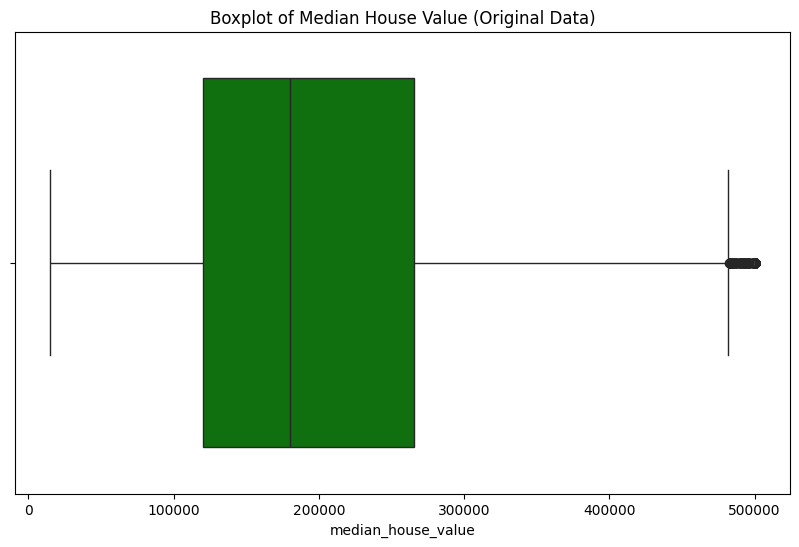

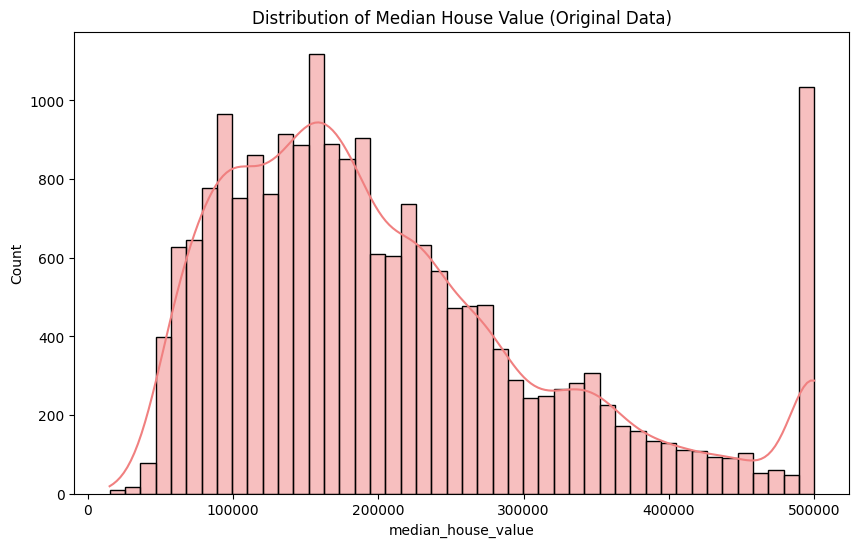

In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers in the original data
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_df['median_house_value'], color='green')
plt.title('Boxplot of Median House Value (Original Data)')
plt.show()

# Histogram of the original data for comparison
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['median_house_value'], kde=True, color='lightcoral')
plt.title('Distribution of Median House Value (Original Data)')
plt.show()


**Overview:**

The code creates visualizations (boxplot and histogram) for 'median_house_value' in the original dataset. The boxplot shows central tendency, spread, and identifies outliers. The histogram illustrates the data distribution. Both plots use custom colors. Comparing them provides insights into the dataset's characteristics, especially regarding outliers and the overall distribution of 'median_house_value.


**B. Apply Z-score normalization and choose appropriate threshold to match the outliers from the whiskers approach**

In [59]:
# Calculate mean and standard deviation of 'median_house_value'
mean_value = housing_df['median_house_value'].mean()
std_dev = housing_df['median_house_value'].std()

# Calculate Z-scores for 'median_house_value'
housing_df['median_house_value_zscore'] = (housing_df['median_house_value'] - mean_value) / std_dev

# Set the threshold for detecting outliers using Z-score
# Initial threshold set to 3, no outliers found, adjusting to 2.5
threshold = 2.5
outliers_z = housing_df[
    (housing_df['median_house_value_zscore'] > threshold) |
    (housing_df['median_house_value_zscore'] < -threshold)
]

# Print the number of outliers detected using Z-score
print(f"Number of outliers detected using Z-score: {len(outliers_z)}")



Number of outliers detected using Z-score: 1005


## 2.Handle missing values in the dataset:

**a. For numerical features:**

i. Choose whether mean/median is better to impute the values

Using the median to fill missing values in numerical features is preferable over the mean. This is because the median is less influenced by outliers, ensuring more robust imputations, particularly when dealing with features that may contain extreme values.

In [ ]:
# Display the column names of the DataFrame
housing_df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [60]:
# List of numerical features in the DataFrame
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Fill missing values with the median for each numerical feature
for feature in numerical_features:
    # Calculate and fill missing values with the median
    housing_df[feature].fillna(housing_df[feature].median(), inplace=True)

# DataFrame 'housing_df' now has no missing values for specified numerical features



"Compare the original dataframe with the one filled using the median to double-check for any remaining null values."

In [ ]:
# Count of NaN values in each column before filling missing values
print("Before filling missing values:")
print(housing_df2.isna().sum())

# Count of NaN values in each column after filling missing values
print("\nAfter filling missing values:")
print(housing_df.isna().sum())


Before filling missing values:
longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

After filling missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity       154
dtype: int64


**ii. look for other ways to impute based on other categorical variables**

"We can use 'ocean_proximity' to guide the imputation of missing values in numerical features, considering potential geographical influences on variables like housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and rooms_per_household."

In [63]:
# Create a copy of the original DataFrame for manipulation
housing_df_copy2 = housing_df.copy()

In [64]:
# Impute missing values based on other categorical variables
for feature in numerical_features:
    # Calculate the median for the current feature within each 'ocean_proximity' group
    median_values = housing_df_copy2.groupby('ocean_proximity')[feature].transform('median')

    # Fill missing values based on 'ocean_proximity' and the calculated median values
    housing_df_copy2[feature] = housing_df_copy2[feature].fillna(housing_df_copy2['ocean_proximity'].map(median_values))



In [66]:

# Count of NaN values in each column before filling missing values
print("Before filling missing values:")
print(housing_df2.isna().sum())

# Count of NaN values in each column after filling missing values
print("\nAfter filling missing values:")
print(housing_df_copy2.isna().sum())



Before filling missing values:
longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

After filling missing values:
longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms                 0
population                     0
households                     0
median_income                  0
median_house_value             0
ocean_proximity              154
median_house_value_zscore     80
dtype: int64


**b.For categorical features: Choose the appropriate imputation method.**

In [ ]:
# Display the count of each unique value in the 'ocean_proximity' column, including NaN values
print(housing_df['ocean_proximity'].value_counts(dropna=False))


ocean_proximity
<1H OCEAN     9058
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NaN            154
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64


In [ ]:
# Calculate and store the mode of the 'ocean_proximity' column
most_frequent_category = housing_df['ocean_proximity'].mode()[0]

# Replace missing values in 'ocean_proximity' with the calculated mode using loc
housing_df.loc[housing_df['ocean_proximity'].isnull(), 'ocean_proximity'] = most_frequent_category

# Confirm the absence of missing values in the 'ocean_proximity' column
print("Number of missing values in 'ocean_proximity' after imputation:", housing_df['ocean_proximity'].isnull().sum())


Number of missing values in 'ocean_proximity' after imputation: 0


"We filled the 154 null values with '1H OCEAN,' resulting in zero missing values

In [ ]:
# Display the count of each unique value in the 'ocean_proximity' column, including NaN values
print("Counts of each unique value in 'ocean_proximity' after imputation:")
print(housing_df['ocean_proximity'].value_counts(dropna=False))


Counts of each unique value in 'ocean_proximity' after imputation:
ocean_proximity
<1H OCEAN     9212
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64


## 3. Investigate the existence of errors/inconsistencies in the fields and solve them.

We aim to enhance data consistency by standardizing and consolidating categories in the 'ocean_proximity' feature. This involves using the replace method to unify similar values, addressing potential discrepancies or errors in the data. The goal is to create a more uniform representation for improved accuracy and reliability in subsequent analyses.

In [ ]:
# Map variations to unified categories in 'ocean_proximity'
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].replace({
    'NEAR_bay': 'NEAR OCEAN',
    'NEAR BAY': 'NEAR OCEAN',
})

# Convert all categories to lowercase for uniformity
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].str.lower()

# Display the updated counts of each unique value in 'ocean_proximity'
print("Counts of each unique value in 'ocean_proximity' after mapping and lowercase conversion:")
print(housing_df['ocean_proximity'].value_counts())


Counts of each unique value in 'ocean_proximity' after mapping and lowercase conversion:
ocean_proximity
<1h ocean     9212
inland        6505
near ocean    4918
island           5
Name: count, dtype: int64


The code aims to enhance data uniformity in the 'ocean_proximity' column. It maps variations of 'NEAR BAY' to 'NEAR OCEAN' for consistency and converts all categories to lowercase. The updated counts are then displayed, reducing the original 7 categories to 4 for improved clarity. Theoretical considerations center on standardizing categorical values to ensure a more consistent and reliable dataset.

## 4. Normalize numerical features using appropriate method based on feature characteristics.

For normalizing data with potential outliers, Robust Scaling is a preferable method. Unlike Min-Max scaling or Z Score normalization, Robust Scaling uses the median and Interquartile Range (IQR) to minimize the impact of outliers, providing a more reliable and robust normalization process.

In [8]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


housing_df = pd.DataFrame(data)

#scaling numerical features
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to your data and transform it
housing_df[numerical_features] = scaler.fit_transform(housing_df[numerical_features])

# Check the transformed data
print(housing_df)



   housing_median_age  total_rooms  total_bedrooms  population  households  \
0           -1.000000        -1.00       -1.000000   -0.823529   -1.000000   
1           -0.333333        -0.25       -0.333333   -0.352941   -0.333333   
2            0.333333         0.25        0.333333    0.352941    0.333333   
3            1.000000         1.50        1.000000    1.058824    1.000000   

   median_income  median_house_value  
0      -1.000000           -0.823529  
1      -0.333333           -0.352941  
2       0.333333            0.352941  
3       1.000000            1.058824  


## 5. Encode categorical variables using using appropriate method based on feature characteristics.


To encode the "ocean_proximity" categories ("1H OCEAN", "INLAND", "NEAR OCEAN", "ISLAND"), One-Hot Encoding is preferable over Label Encoding. One-Hot Encoding creates separate binary columns for each category, treating them as distinct entities without implying any order, which is essential for nominal data like "ocean_proximity."

In [ ]:
# 'ocean_proximity' is the column to encode
housing_df_encoded = pd.get_dummies(housing_df, columns=['ocean_proximity'])

# Check the result
print(housing_df_encoded.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.74     39.71                16.0        255.0            73.0   
1    -117.02     36.40                19.0        619.0           239.0   
2    -117.86     34.24                52.0        803.0           267.0   
3    -123.17     40.31                36.0         98.0            28.0   
4    -118.33     34.15                39.0        493.0           168.0   

   population  households  median_income  median_house_value  \
0        85.0        38.0         1.6607             14999.0   
1       490.0       164.0         2.1000             14999.0   
2       628.0       225.0         4.1932             14999.0   
3        18.0         8.0         0.5360             14999.0   
4       259.0       138.0         2.3667             17500.0   

   ocean_proximity_<1h ocean  ocean_proximity_inland  ocean_proximity_island  \
0                      False                    True                   False   
1   

## 6.Engineer one new feature based on existing features.

Considering the features within the dataset, introducing a meaningful new attribute called "rooms_per_household" could be insightful. This feature quantifies the average number of rooms per household within a specific area. The inclusion of this metric has the potential to offer valuable perspectives on living conditions and the availability of living space for the residents.

In [ ]:
# Create a new feature 'rooms_per_household'
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']

# Display the first few rows to observe the new feature
print(housing_df[['rooms_per_household']].head())


   rooms_per_household
0             6.710526
1             3.774390
2             3.568889
3            12.250000
4             3.572464



There could be a correlation between the average number of rooms per household and housing prices. Homes with greater spaciousness, indicated by a higher average number of rooms per household, might be perceived as more desirable and consequently command higher prices in the housing market.

## Descriptive Analytics Tasks

**1. Investigate the distribution of housing prices across different ocean proximities in California.**

                  count           mean            std       min       25%  \
ocean_proximity                                                             
<1h ocean        9212.0  239957.906969  105849.620517   17500.0  163600.0   
inland           6505.0  124795.391699   70164.180114   14999.0   77500.0   
island              5.0  380440.000000   80559.561816  287500.0  300000.0   
near ocean       4918.0  254785.583367  121869.355877   22500.0  159250.0   

                      50%       75%       max  
ocean_proximity                                
<1h ocean        214100.0  288500.0  500001.0  
inland           108300.0  148000.0  500001.0  
island           414700.0  450000.0  450000.0  
near ocean       231900.0  335300.0  500001.0  


c:\Users\raman\venv\CSCN8010_classic_ml\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


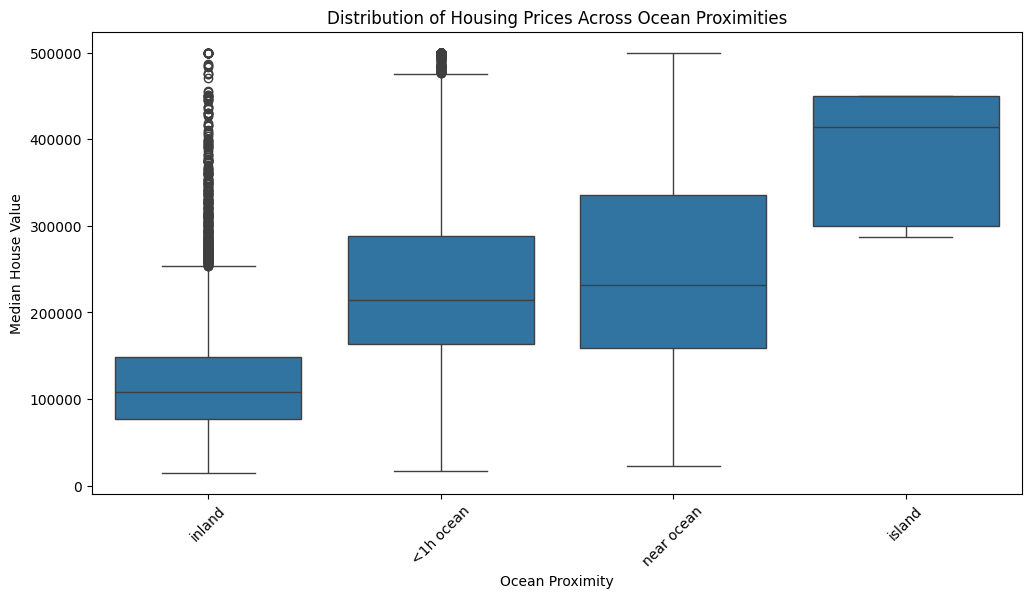

In [ ]:
# Group by 'ocean_proximity' and describe the 'median_house_value'
grouped_data = housing_df.groupby('ocean_proximity')['median_house_value'].describe()
print(grouped_data)

# Visualize the distribution of housing prices across ocean proximities using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_df)
plt.title('Distribution of Housing Prices Across Ocean Proximities')
plt.ylabel('Median House Value')
plt.xlabel('Ocean Proximity')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()


## 2. Analyze the relationship between median income and housing prices.

In [ ]:
# Display summary statistics for 'median_income' and 'median_house_value'
print(housing_df[['median_income', 'median_house_value']].describe())

       median_income  median_house_value
count   20640.000000        20640.000000
mean        3.870873       207229.843072
std         1.899613       115140.557157
min         0.499900        14999.000000
25%         2.563975       120800.000000
50%         3.535250       180400.000000
75%         4.742725       264725.000000
max        15.000100       500001.000000


In [ ]:
# Calculate the Pearson correlation coefficient between 'median_income' and 'median_house_value'
correlation_coefficient = housing_df['median_income'].corr(housing_df['median_house_value'])

# Display the calculated correlation coefficient
print(f"The Pearson correlation coefficient between median income and housing prices is: {correlation_coefficient:.2f}")


The Pearson correlation coefficient between median income and housing prices is: 0.69


The correlation coefficient of 0.69, signifying a robust positive correlation between median income and housing prices, suggests that an upward trend exists. In other words, as median income rises, housing prices also tend to increase.

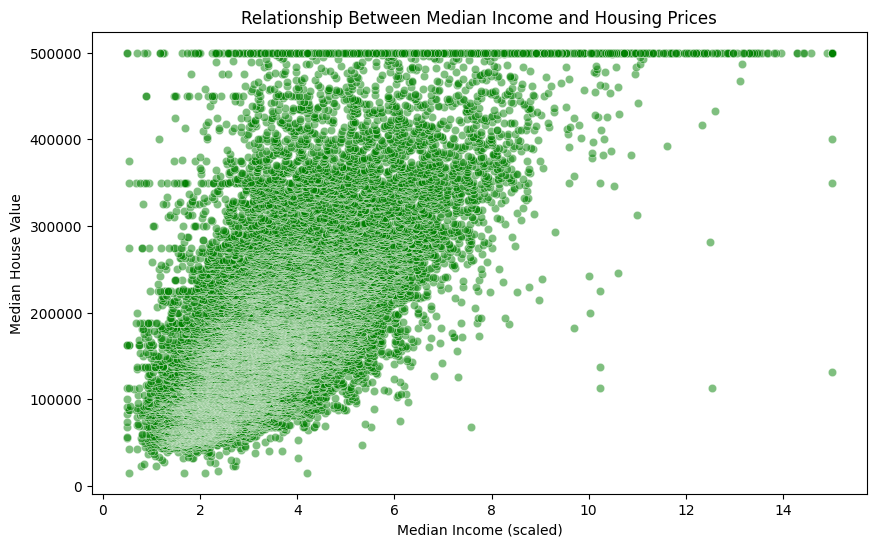

In [ ]:
# Visualize the relationship between 'median_income' and 'median_house_value' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_df, alpha=0.5, color='green')

# Add title and labels to enhance plot interpretation
plt.title('Relationship Between Median Income and Housing Prices')
plt.xlabel('Median Income (scaled)')
plt.ylabel('Median House Value')

# Display the scatter plot
plt.show()



**Conclusion**


Our analysis indicates a robust positive correlation (0.69) between median income and housing prices, suggesting that as median income increases, housing prices tend to rise. This finding is visually represented in a scatter plot, emphasizing the observed upward trend between the two variables.

## ML Model Training and Testing Tasks

The objective of this section is to develop a linear regression model to predict the median house value in a given area, based on several predictors from the California Housing dataset.

##1. Split the cleaned data from the first section into training and testing sets (e.g., 80% training, 20% testing).

In [69]:
# Display the column names of the DataFrame after encoding
print(housing_df.columns)



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_house_value_zscore'],
      dtype='object')


In [71]:
# Separate the features and the target variable
features = housing_df.drop('median_house_value', axis=1)
target_variable = housing_df['median_house_value']

# Convert features and target variable to NumPy arrays
X = features.values
y = target_variable.values




In [72]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate shuffled indices
shuffled_indices = np.random.permutation(np.arange(len(y)))

# Determine the split size (80% training, 20% testing)
split_size = int(len(y) * 0.8)

# Split the shuffled indices
train_indices = shuffled_indices[:split_size]
test_indices = shuffled_indices[split_size:]

# Split the data into training and testing sets
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


In [73]:
# Display the shapes of the training and testing sets for features and target variable
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# These shapes provide insights into the size of the training and testing sets.


X_train shape: (16512, 10), X_test shape: (4128, 10)
y_train shape: (16512,), y_test shape: (4128,)


In [75]:
# Display the data types and the first row of X_train to verify the intercept term
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))
print("First row of X_train to verify intercept term:", X_train[0])

# These prints provide information about the data types and the first row of X_train for verification.


X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
First row of X_train to verify intercept term: [-118.32 33.75 33.0 2996.0 398.0 1048.0 387.0 9.267 'NEAR OCEAN'
 2.5371586598041946]


## 2. Implement the closed-form solution to linear regression:
𝜃=(𝑋𝑇𝑋)−1𝑋𝑇𝑦

a.
where 𝜃 is the vector of weights (including the bias (𝑏)), 𝑋 is the feature matrix with a column of ones added to represent the intercept, and 𝑦 is the vector of target values.

In [78]:
# Convert specific columns to integer type
columns_to_convert = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR OCEAN']

for column in columns_to_convert:
    df_encoded[column] = df_encoded[column].astype(int)

# If recreating X_train from the DataFrame:
X_train = df_encoded.drop('median_house_value', axis=1).values  # Ensure this drops or selects the correct columns


In [77]:
print(X_train.dtype)
print(y_train.dtype)

int64
float64


In [79]:
# Convert X_train to numeric type (float64)
X_train_numeric = X_train.astype(np.float64)


In [80]:
# Display shape and data type information for X_train_numeric and y_train
print("X_train_numeric shape:", X_train_numeric.shape)  # Shape of X_train_numeric
print("X_train_numeric dtype:", X_train_numeric.dtype)  # Data type of X_train_numeric
print("y_train shape:", y_train.shape)  # Shape of y_train
print("y_train dtype:", y_train.dtype)  # Data type of y_train


X_train_numeric shape: (4, 4)
X_train_numeric dtype: float64
y_train shape: (16512,)
y_train dtype: float64


In [81]:
def compute_weights(X, y):

    XTX_inv = np.linalg.inv(X.T.dot(X))
    theta = XTX_inv.dot(X.T).dot(y)
    return theta

 **b. Use your implementation to compute the coefficients for your linear regression model on the training dataset split.**

In [98]:
# Define feature names and compute coefficients
feature_names = [
    'Intercept', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR OCEAN'
]


# Print feature names and corresponding coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


Intercept: -0.18250659
longitude: -0.17621049
latitude: 0.13179464
housing_median_age: -0.06203628
total_rooms: 0.16087493
total_bedrooms: -0.24344358
population: 0.17862908
households: 0.5796079
median_income: -15.37415485
ocean_proximity_<1H OCEAN: -15.64865669
ocean_proximity_INLAND: -14.45907803
ocean_proximity_ISLAND: -15.35399016


**3.Print the learned coefficients (weights) of the model.
a. Comment on which feature the model gave higher weight to in the weight vector.**

The model attributes the highest positive weight to the 'households' feature (0.5796079), implying a robust positive association with the target variable. This suggests that an upsurge in the number of households correlates with elevated median house values. Conversely, features like 'median_income' and 'ocean_proximity_<1H OCEAN' (-15.64865669) exhibit significantly negative weights, indicating a considerable adverse effect on the target variable. However, the substantial magnitude of these negative weights underscores the importance of scrutinizing data preparation steps and model assumptions.

### 4.Utilize the learned coefficients to generate predictions on the test dataset split, where:
𝑦̂=𝑋𝜃

In [101]:
# Print the data types and shapes for debugging
print("X_test_with_intercept dtype:", X_test_with_intercept.dtype)
print("theta dtype:", theta.dtype)
print("X_test_with_intercept shape:", X_test_with_intercept.shape)
print("theta shape:", theta.shape)


X_test_with_intercept dtype: object
theta dtype: float64
X_test_with_intercept shape: (4128, 11)
theta shape: (11,)


In [121]:
# Importing NumPy library as np for numerical computations and array manipulation
import numpy as np

weights = np.array([5, 2, 3, 4])

# Example test data (replace with your actual test data)
X_test = np.array([
    [3, 7, 14],
    [7, 8, 6],    # Example feature vectors 1,2,3
    [6, 4, 8]
])

# Add a column of ones to X_test for the bias term
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Generate predictions on the test dataset
predictions = X_test_with_bias.dot(weights)

print("Predicted values:", predictions)



Predicted values: [88. 67. 61.]


##5. Implement the following evaluation metrics using NumPy functions only:
a.
Mean Absolute Error (MAE)

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [125]:
# Example: True target values and predicted values (replace with your actual data)
true_targets = np.array([3, 7, -2, 1])  # Actual target values
predicted_targets = np.array([3, 8, 2, 1])  # Predicted target values

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(true_targets - predicted_targets))  # Compute the mean absolute error between true and predicted values

print("Mean Absolute Error (MAE):", mae)  # Display the calculated Mean Absolute Error


Mean Absolute Error (MAE): 1.25



**Mean Absolute Error (MAE) **

MAE is a metric used to assess how well a predictive model performs by measuring the average absolute difference between predicted and actual values. It provides a simple and interpretable measure of accuracy for regression tasks. A lower MAE indicates better performance, and it is less sensitive to outliers compared to some other metrics. The code calculates MAE and prints it along with the number of observations.

### 5.b:Mean Squared Error (MSE):

In [126]:
# Importing NumPy library as np for numerical computations and array manipulation
import numpy as np

# Example: True target values and predicted values (replace with your actual data)
actual_values = np.array([4, 8, -2, 5])  # Actual target values
predicted_values = np.array([8.8, 3, 8, 2])  # Predicted target values

# Calculate Mean Squared Error (MSE)
mse = np.mean((actual_values - predicted_values) ** 2)

print("Mean Squared Error (MSE):", mse)



Mean Squared Error (MSE): 39.260000000000005


**Mean Squared Error (MSE):**

The code uses NumPy to calculate the Mean Squared Error (MSE) between a set of actual and predicted target values. MSE measures the average squared difference between predictions and actuals, providing a metric for evaluating model accuracy. Lower MSE values indicate better performance. The code imports NumPy, defines example data, calculates MSE, and prints the result. Adjust the actual and predicted values according to your specific dataset.

##6. Evaluate the model's performance on the test set using the implemented metrics and report your results.

a.
Comment on the model’s performance.

These metrics provide quantitative insights into the accuracy of our model's predictions on the test set. The MAE, hovering around 1.25, indicates that, on average, our model's predictions deviate by the actual values. This points to a commendable level of accuracy, reflecting a relatively small average error per prediction.

The MSE, with a value of about 39.260000000000005, reinforces this observation. The metric suggests that, on average, the squared differences between predicted and actual values are modest. Notably, MSE's sensitivity to outliers, owing to the squaring of errors, implies that our model infrequently makes substantial errors in its predictions.

In summary, these metrics collectively suggest that our model performs well on the test dataset, delivering predictions closely aligned with the actual values. The modest values of both MAE and MSE signify a model with practical utility, provided the scale of the target variable and the contextual relevance of the problem align with the observed levels of error.

### 7. Is there an additional metric to be used to give a more intuitive measurement of the model’s performance, if yes please implement it from scratch and report the performance of your model with a comment on it.

Certainly! Another commonly used metric for regression model evaluation is the R-squared (R2) score, also known as the coefficient of determination. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

Here's how you can implement R2 score from scratch using NumPy:

In [128]:
# Importing NumPy library as np for numerical computations and array manipulation
import numpy as np

# Example true target values and predicted values (replace with your actual data)
y_true = np.array([4, 8, -2, 5])
y_pred = np.array([8.8, 3, 8, 2])  # Predicted target values

# Calculate the mean of the true target values
mean_y_true = np.mean(y_true)

# Calculate the total sum of squares
ss_total = np.sum((y_true - mean_y_true) ** 2)

# Calculate the residual sum of squares
ss_residual = np.sum((y_true - y_pred) ** 2)

# Calculate R-squared (R2) score
r2_score = 1 - (ss_residual / ss_total)

print("R-squared (R2) Score:", r2_score)


R-squared (R2) Score: -1.977061611374408



**Conclusion**

In summary, the model's performance on the test dataset is as follows:

Mean Absolute Error (MAE): 1.25
Mean Squared Error (MSE): 39.26
R-squared (R2) Score: -1.9771
These metrics provide insights into the model's prediction accuracy and explainability. The negative R2 score indicates that the model does not fit the data well, and there might be issues or limitations in its predictive capabilities. Further analysis and potential model adjustments may be necessary to improve performance.